# eFeature Extraction Library

The eFEL Python library can be used to extract eFeatures (like action potential width, firing frequency, etc) from membrane voltage traces recording during electrophysiological experiments on neurons.

This notebook shows an introductory example on how to use this library.

First we need to install the library and import it together with some helper functionality.

In [1]:
!pip install efel json2html
import efel

import urllib, numpy, IPython
from json2html import *

%matplotlib notebook
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = 10, 10

## Fetching the data

We will fetch the data from the test directory in the eFEL Github repository. The data consists of a text file with the first column being the time points and the second the membrane voltage (in respectively, ms and mV)

In [2]:
test_url = 'https://raw.githubusercontent.com/BlueBrain/eFEL/master/efel/tests/testdata/allfeatures/testdata.txt'
test_data = numpy.loadtxt(urllib.urlopen(test_url))
time = test_data[:,0]
voltage = test_data[:, 1]

We can now plot this data

<IPython.core.display.Javascript object>


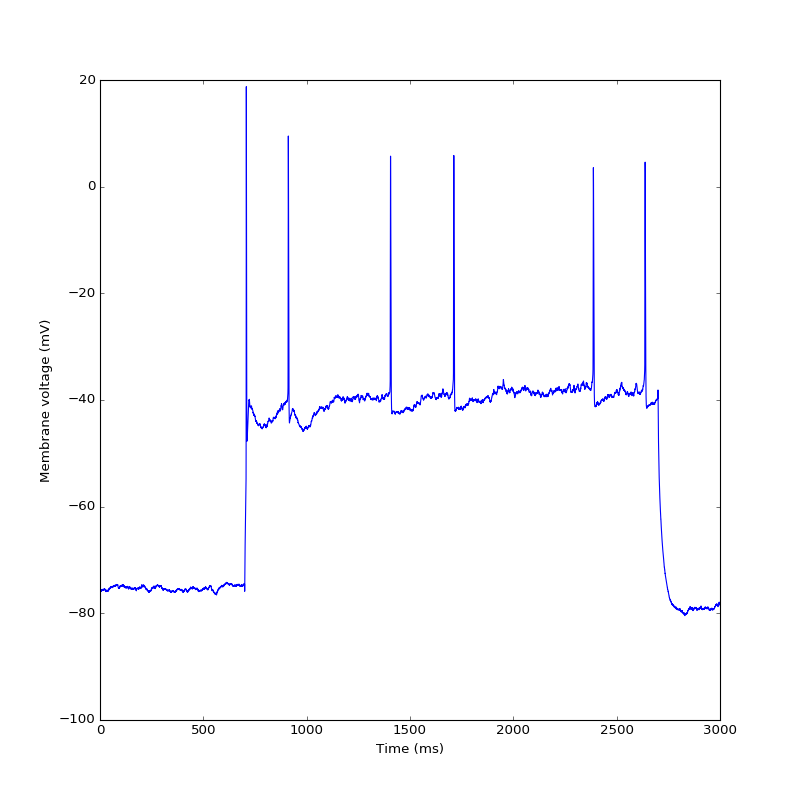

In [3]:
plt.rcParams['figure.figsize'] = 10, 10

fig1, ax1 = plt.subplots(1)
ax1.plot(time, voltage)
ax1.set_xlabel('Time (ms)')
ax1.set_ylabel('Membrane voltage (mV)');

Let's zoom in on one spike

<IPython.core.display.Javascript object>


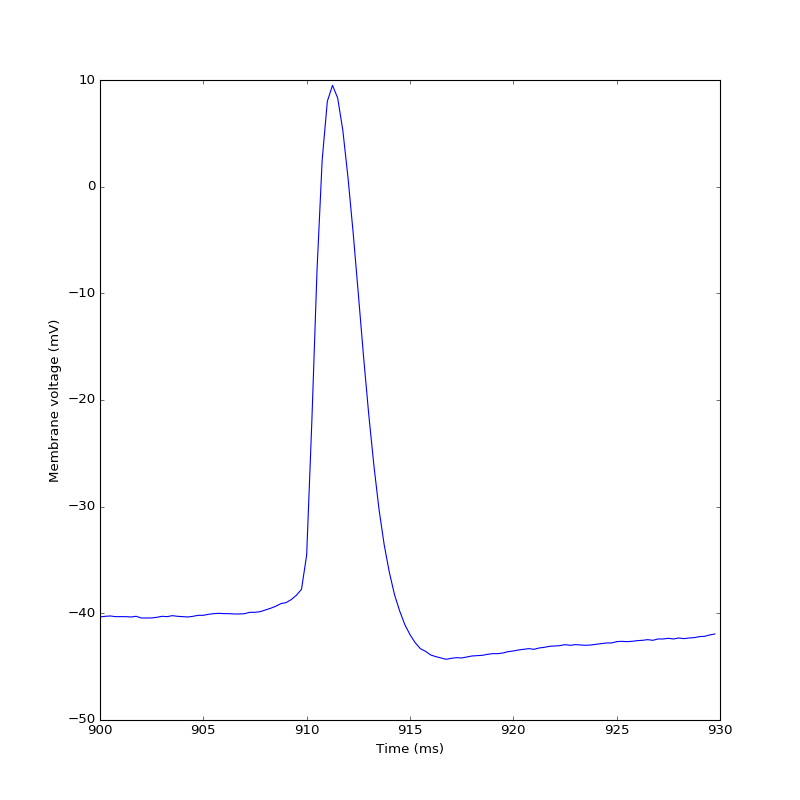

In [4]:
fig2, ax2 = plt.subplots(1)
time_spike_indices = numpy.where((time > 900) & (time < 930))
time_spike = time[time_spike_indices]
voltage_spike = voltage[time_spike_indices]
ax2.plot(time_spike, voltage_spike)
ax2.set_xlabel('Time (ms)')
ax2.set_ylabel('Membrane voltage (mV)');

## eFeature extraction

Now that we have the data, we can use the eFEL to extract eFeature values from the trace.

We will use the getFeatureValues() function, which accepts as input a dictionary that represents the trace, and the request eFeature names. The trace dictionary consists of the time and voltage trace, and two floats stim_start and stim_end that specify when the stimulus starts and stops.

In [5]:
stim_start = 700
stim_end = 2700
trace = {'T': time, 'V': voltage, 'stim_start': [stim_start], 'stim_end': [stim_end]}

Now we call the getFeatureValues() function and print the eFeature values. The eFeatures that are calculated on single action potentials will return a list with the values for the individual spikes. 

In [6]:
feature_values = efel.getFeatureValues([trace], ['AP_amplitude', 'peak_time', 'peak_voltage', 'AP_begin_time', 'AP_begin_width', 
                                                 'AP_begin_voltage', 'mean_frequency'])[0]
feature_values = {feature_name: list(values) for feature_name, values in feature_values.iteritems()}
IPython.display.HTML(json2html.convert(json=feature_values))

AP_amplitude,72.578244126246.367255261841.154667915839.763175095336.161465303137.8489295737
AP_begin_time,706.8909.81404.31710.32385.72636.0
peak_voltage,18.74902009959.262291412645.718466520145.843234642613.562320229254.47506990872
AP_begin_width,4.74.44.74.64.85.0
mean_frequency,3.09629476726
AP_begin_voltage,-53.8292240267-37.1049638492-35.4362013957-33.9199404527-32.5991450739-33.373859665
peak_time,708.0911.31406.01712.02387.52637.8


We can take the calculated eFeatures for the first action potential, and overlay them on a plot.

<IPython.core.display.Javascript object>


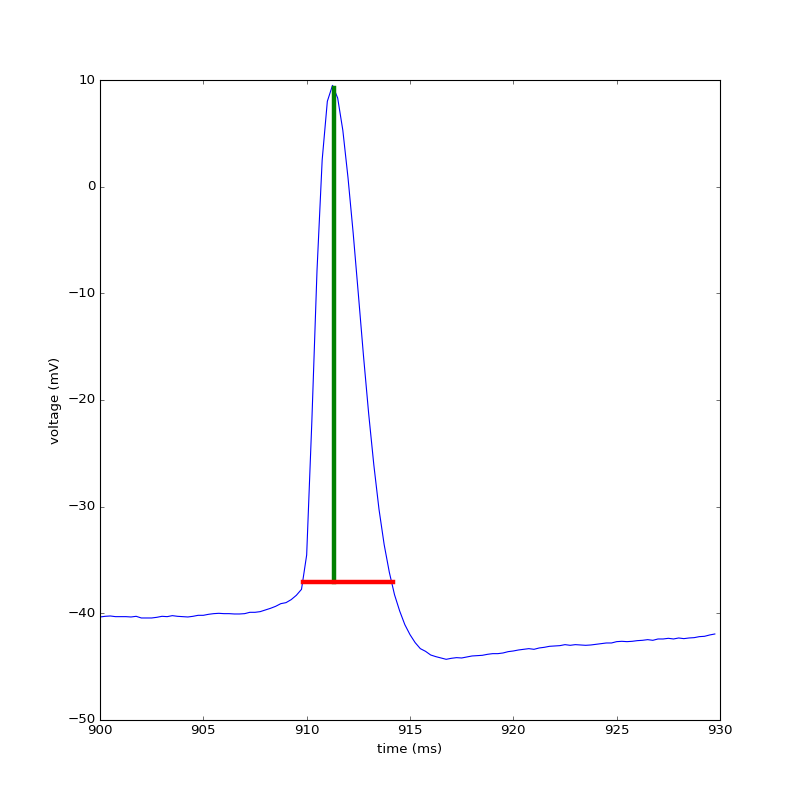

In [8]:
second_peak_time = feature_values['peak_time'][1]
second_peak_voltage = feature_values['peak_voltage'][1]
second_peak_amplitude = feature_values['AP_amplitude'][1]
second_ap_begin_time = feature_values['AP_begin_time'][1]
second_ap_begin_width = feature_values['AP_begin_width'][1]
second_ap_begin_voltage = feature_values['AP_begin_voltage'][1]

time_spike_indices = numpy.where((time > 900) & (time < 930))
time_spike = time[time_spike_indices]
voltage_spike = voltage[time_spike_indices]

fig3, ax3 = plt.subplots(1)
ax3.plot(time_spike, voltage_spike)
ax3.plot([second_peak_time, second_peak_time], [second_peak_voltage, second_peak_voltage-second_peak_amplitude], linewidth=4)
ax3.plot([second_ap_begin_time, second_ap_begin_time+second_ap_begin_width], 
         [second_ap_begin_voltage, second_ap_begin_voltage], linewidth=4)
ax3.set_xlabel('time (ms)')
ax3.set_ylabel('voltage (mV)');